# 뉴스기사 워드클라우드

In [1]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
news = pd.read_csv("C:/Users/User/Desktop/2021코딥러닝프로젝트/주제분석_데이터파일/news_data_final.csv")
news['date'] = pd.to_datetime(news['date'])
news.head()

,Unnamed: 0,date,press,title,content,link
0,0,2021-04-01,국민일보,횡보하더니…비트코인 7300만원 뚫었다,가상화폐 대표주자 비트코인의 가격이 연일 고점을 높이고 있다. 사상 처음으로 7...,http://news.kmib.co.kr/article/view.asp?arcid=...
1,1,2021-04-01,연합뉴스언론사 선정,"비트코인, 고점 계속 높여…7천300만원 돌파",국내 거래소에서 가상화폐 비트코인이 연일 고점을 높이면서 사상 처음으로 7천30...,http://yna.kr/AKR20210401196100002?did=1195m
2,2,2021-04-01,한스경제,"파이코인, '제2의 비트코인' 별칭 갑론을박","◆ 파이코인 지지자들, ""제 2의 비트코인 될 것"" 파이코인은 최근 1500만명...",http://www.sporbiz.co.kr/news/articleView.html...
3,3,2021-04-01,세계일보,7200만원 돌파한 비트코인… 개인투자자 주식보유액은 240조원 증가,국민참여형 뉴딜 펀드 완판 행진 비트코인 시세가 또다시 최고가를 경신했다. 가상...,http://www.segye.com/content/html/2021/04/01/2...
4,4,2021-04-01,더게임스데일리,하이브리드스쿼드 '포기하지마 바운시' 스위치 발매,이 작품은 리듬에 맞춰 적절한 타이밍에 음악 비트의 도움을 받아 점프하는 방식으...,http://www.tgdaily.co.kr/news/articleView.html...


In [4]:
twitter = Twitter()

C:\Users\User\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [5]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'+'↑↓▼▲◆·'
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

In [6]:
def clean_punc(text, punct, mapping): 
    for p in mapping: 
        text = text.replace(p, "") 
    for p in punct: 
        text = text.replace(p, "")
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}
    for s in specials: 
        text = text.replace(s, "") 
    return text.strip()

In [7]:
mask = (news['date'] > '2020-08-01') & (news['date'] <= '2021-04-01')
news_2017=news.loc[mask]
news_2017.head()

,Unnamed: 0,date,press,title,content,link
0,0,2021-04-01,국민일보,횡보하더니…비트코인 7300만원 뚫었다,가상화폐 대표주자 비트코인의 가격이 연일 고점을 높이고 있다. 사상 처음으로 7...,http://news.kmib.co.kr/article/view.asp?arcid=...
1,1,2021-04-01,연합뉴스언론사 선정,"비트코인, 고점 계속 높여…7천300만원 돌파",국내 거래소에서 가상화폐 비트코인이 연일 고점을 높이면서 사상 처음으로 7천30...,http://yna.kr/AKR20210401196100002?did=1195m
2,2,2021-04-01,한스경제,"파이코인, '제2의 비트코인' 별칭 갑론을박","◆ 파이코인 지지자들, ""제 2의 비트코인 될 것"" 파이코인은 최근 1500만명...",http://www.sporbiz.co.kr/news/articleView.html...
3,3,2021-04-01,세계일보,7200만원 돌파한 비트코인… 개인투자자 주식보유액은 240조원 증가,국민참여형 뉴딜 펀드 완판 행진 비트코인 시세가 또다시 최고가를 경신했다. 가상...,http://www.segye.com/content/html/2021/04/01/2...
4,4,2021-04-01,더게임스데일리,하이브리드스쿼드 '포기하지마 바운시' 스위치 발매,이 작품은 리듬에 맞춰 적절한 타이밍에 음악 비트의 도움을 받아 점프하는 방식으...,http://www.tgdaily.co.kr/news/articleView.html...


In [8]:
print(len(news_2017))

23126


In [9]:
cleaned_corpus_t = []
for sent in news_2017['title']:
    cleaned_corpus_t.append(clean_punc(sent, punct, punct_mapping))

In [10]:
cleaned_corpus_c = []
for sent in news_2017['content']:
    cleaned_corpus_c.append(clean_punc(sent, punct, punct_mapping))

In [11]:
for i in range(0, 10):
    print(cleaned_corpus_t[i])

횡보하더니비트코인 7300만원 뚫었다
비트코인 고점 계속 높여7천300만원 돌파
파이코인 제2의 비트코인 별칭 갑론을박
7200만원 돌파한 비트코인 개인투자자 주식보유액은 240조원 증가
하이브리드스쿼드 포기하지마 바운시 스위치 발매
선거를 흔드는 벼락거지의 분노
비트코인 연일 최고가 경신 이유는 인도 정부의 정책 선회 주목
경제칼럼 금리와 주택시장
4년 묵힌 몰수 비트코인 첫 처분가치 45배 껑충
비트코인 7200만원대 첫 돌파코인빗 블록체인 무한성의 저력 드러날 것


In [12]:
for i in range(0, 10):
    print(cleaned_corpus_c[i])

가상화폐 대표주자 비트코인의 가격이 연일 고점을 높이고 있다 사상 처음으로 7300만원을 돌파했다 1일 가상화폐 거래소 업비트에 따르면 이날 오후 11시30분 현재 비트코인 1개는 7308만4000원에 거래되고 있다
국내 거래소에서 가상화폐 비트코인이 연일 고점을 높이면서 사상 처음으로 7천300만원을 넘어섰다 가상화폐 거래소 업비트에 따르면 1일 오후 11시 30분 현재 1비트코인은 7천308만4천원이다 업비트에서
파이코인 지지자들 제 2의 비트코인 될 것 파이코인은 최근 1500만명 유저를 돌파하며 확실하게 인기몰이를 하고 있다 해당 유저들은 파이코인에 든든한 지지를 보내며 파이코인이 제2의 비트코인으로 성장할
국민참여형 뉴딜 펀드 완판 행진 비트코인 시세가 또다시 최고가를 경신했다 가상화폐거래소 업비트에 따르면 1일 오후 3시30분 기준 1비트코인 시세는 7190만원에 거래됐다 가상화폐 거래소 업비트에 따르면
이 작품은 리듬에 맞춰 적절한 타이밍에 음악 비트의 도움을 받아 점프하는 방식으로 진행된다 중독성이 게임 진행 과정에서 획득한 코인으로 구입할 수 있는 이펙트 요소도 30개 이상 준비됐다 귀여운 캐릭터의
집값이 오르는 속도에 좌절한 직장인 중에는 일할 의욕이 잃고 주식이나 비트코인 등으로 한탕을 노리는 이들이 적지 않다 어린아이들도 건물주를 꿈꾸는 세상이 됐다 가만히 앉아 임대료를 챙기면서 때론
화이트페이퍼 WHITEPAPER사진온라인 커뮤니티 캡쳐 가상화폐 대표격인 비트코인이 연일 최고가를 경신하며 핫이슈로 급부상 중이다 1일 가상화폐 거래소 업비트에 따르면 비트코인의 시세는 전일 대비 214000원03
전세자금대출이 증가한다는 것은 상대적으로 현금흐름이 취약한 230대의 젊은 층의 부채가 증가한다는 것이다 실제로도 소득2분위와 30대의 자산주택주식비트코인 등증가 속도가 가장 빠르다 이들은
검찰이 불법 음란물 사이트 운영자로부터 몰수한 비트코인을 최근 매각해 120억 원을 국고에 귀속했습니다 몰수한 비트코인을 국고에 귀속한 것은 이번이 처음입니다 

In [13]:
text=""
for i in range(0, len(cleaned_corpus_t)):
    text += " " + cleaned_corpus_t[i]
for i in range(0, len(cleaned_corpus_c)):
    text += " " + cleaned_corpus_c[i]

In [14]:
sentences_tag = []
sentences_tag = twitter.pos(text) 
noun_adj_list = []

In [15]:
# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)


# 가장 많이 나온 단어부터 100개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(150)

In [16]:
wc = WordCloud(font_path="C:/Users/User/Downloads/RixYeoljeongdo_Regular/RixYeoljeongdo Regular.ttf",
               background_color="white",
               width=900,
               height=900,
               colormap='YlOrBr',
               max_font_size=250)

In [17]:
cloud = wc.generate_from_frequencies(dict(tags))

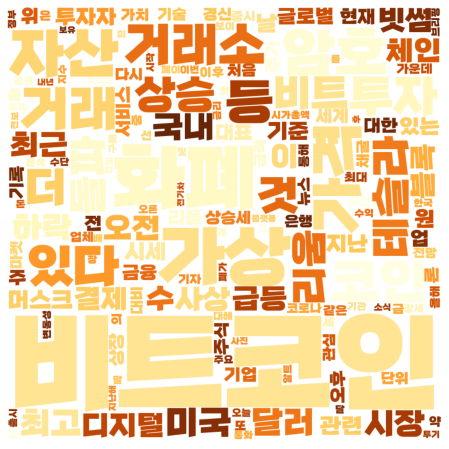

In [18]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()


In [19]:
import os
os.chdir("C:/Users/User/Desktop/주제분석")
cloud.to_file('wordcloud_2020-2021.jpg')

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: 'C:/Users/User/Desktop/주제분석'